In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
fraud = pd.read_csv(r'F:\data science\Jupyter\work file\datasets\fraud.csv')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### description of columns

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction.

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [5]:
fraud['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

create new features to calculate the difference in balance between before and after the transaction

In [6]:
fraud['balanceOrigDiff'] = fraud['oldbalanceOrg'] - fraud['newbalanceOrig']

In [7]:
fraud['balanceDestDiff'] = fraud['newbalanceDest'] - fraud['oldbalanceDest']

determine a merchant vs customer

In [8]:
fraud['merchantDest'] = np.where(fraud['nameDest'].str.match(r'^M.*'),1,0)
fraud['customerDest'] = np.where(fraud['nameDest'].str.match(r'^C.*'),1,0)

In [9]:
fraud.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,merchantDest,customerDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1,0


### EDA

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

In [11]:
fraudT = fraud[fraud['isFraud'] == 1]
fraudF = fraud[fraud['isFraud'] != 1]

In [12]:
fraudT.info(),fraudF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8213 entries, 2 to 6362619
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   step             8213 non-null   int64  
 1   type             8213 non-null   object 
 2   amount           8213 non-null   float64
 3   nameOrig         8213 non-null   object 
 4   oldbalanceOrg    8213 non-null   float64
 5   newbalanceOrig   8213 non-null   float64
 6   nameDest         8213 non-null   object 
 7   oldbalanceDest   8213 non-null   float64
 8   newbalanceDest   8213 non-null   float64
 9   isFraud          8213 non-null   int64  
 10  isFlaggedFraud   8213 non-null   int64  
 11  balanceOrigDiff  8213 non-null   float64
 12  balanceDestDiff  8213 non-null   float64
 13  merchantDest     8213 non-null   int32  
 14  customerDest     8213 non-null   int32  
dtypes: float64(7), int32(2), int64(3), object(3)
memory usage: 962.5+ KB
<class 'pandas.core.frame.DataFram

(None, None)

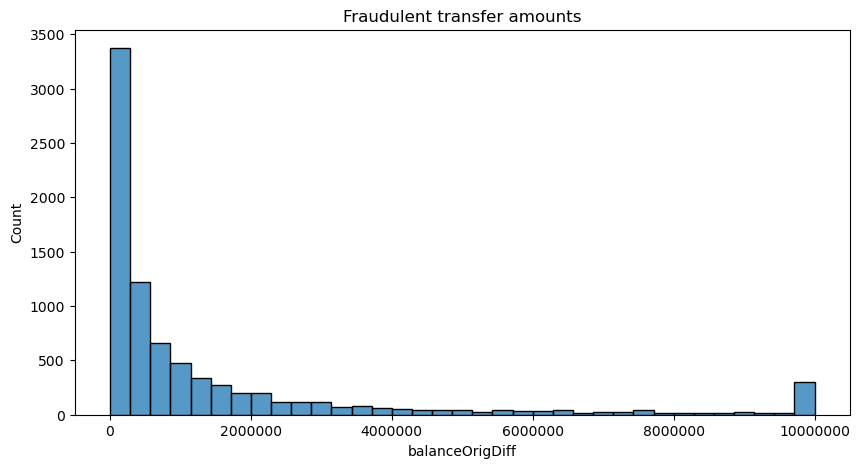

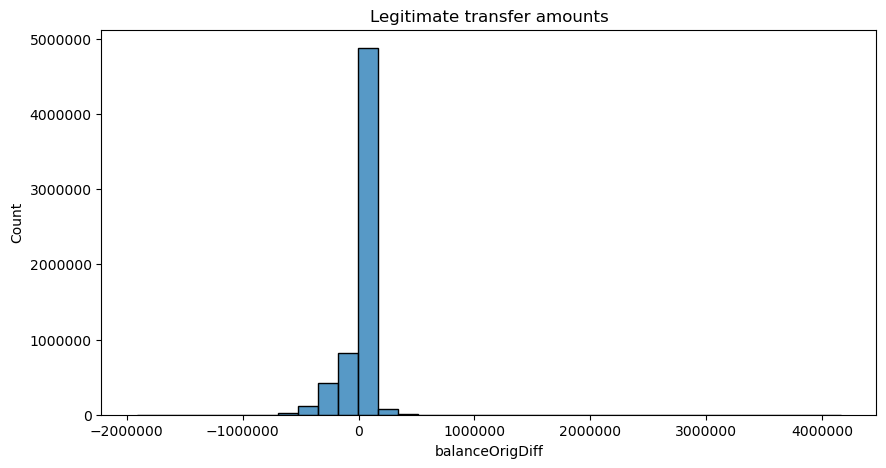

In [13]:
plt.figure(1,figsize=(10,5))
sns.histplot(data=fraudT,x='balanceOrigDiff',bins=35)
plt.ticklabel_format(style='plain',axis='both')
plt.title('Fraudulent transfer amounts')
plt.show()

plt.figure(2,figsize=(10,5))
sns.histplot(data=fraudF,x='balanceOrigDiff',bins=35)
plt.ticklabel_format(style='plain',axis='both')
plt.title('Legitimate transfer amounts')
plt.show()


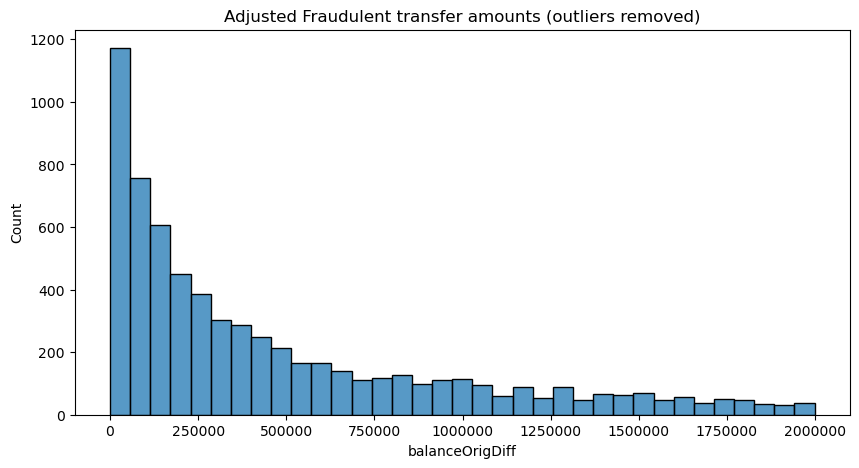

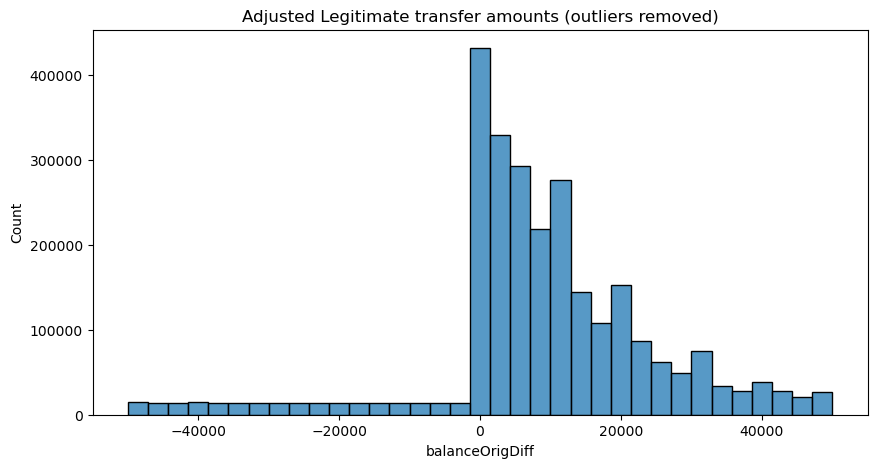

In [14]:
fraudT_balance = fraudT[fraudT['balanceOrigDiff'] < 2000000].copy()
fraudF_balance = fraudF[(fraudF['balanceOrigDiff'] < 50000) & (fraudF['balanceOrigDiff'] > -50000) & (fraudF['balanceOrigDiff'] != 0)].copy()

plt.figure(1,figsize=(10,5))
sns.histplot(data=fraudT_balance,x='balanceOrigDiff',bins=35)
plt.ticklabel_format(style='plain',axis='both')
plt.title('Adjusted Fraudulent transfer amounts (outliers removed)')
plt.show()

plt.figure(2,figsize=(10,5))
sns.histplot(data=fraudF_balance,x='balanceOrigDiff',bins=35)
plt.ticklabel_format(style='plain',axis='both')
plt.title('Adjusted Legitimate transfer amounts (outliers removed)')
plt.show()

<Figure size 640x480 with 0 Axes>

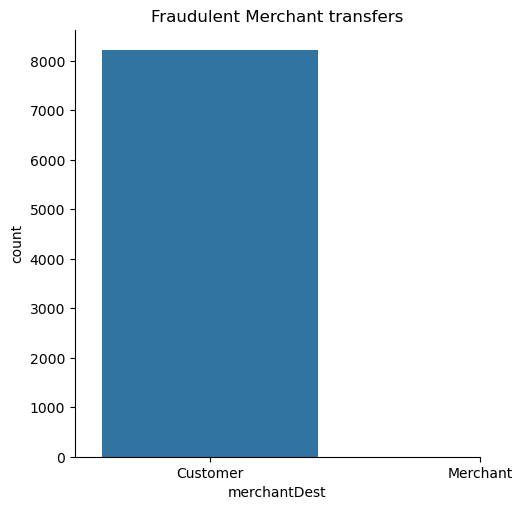

<Figure size 640x480 with 0 Axes>

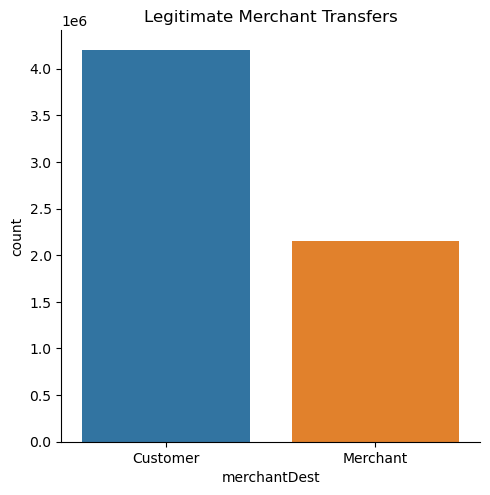

In [15]:
plt.figure(1)
sns.catplot(data=fraudT,x='merchantDest',kind='count')
plt.title('Fraudulent Merchant transfers')
plt.xticks([0,1],['Customer','Merchant'])
plt.show()

plt.figure(2)
sns.catplot(data=fraudF,x='merchantDest',kind='count')
plt.title('Legitimate Merchant Transfers')
plt.xticks([0,1],['Customer','Merchant'])
plt.show()

<Figure size 640x480 with 0 Axes>

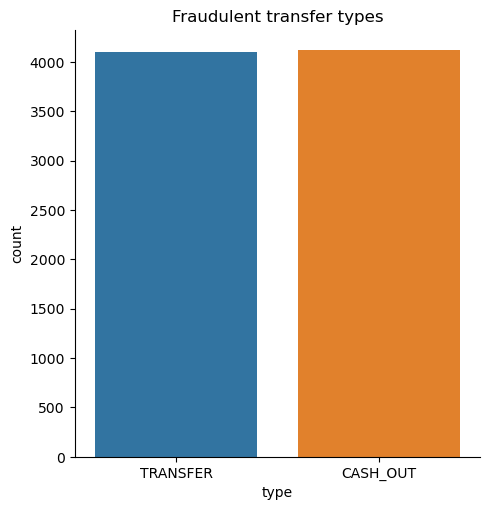

<Figure size 640x480 with 0 Axes>

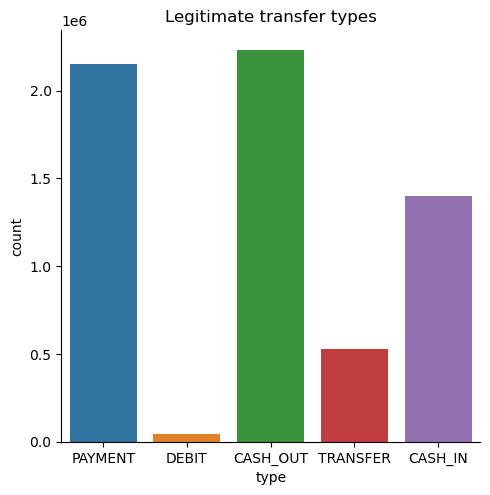

In [16]:
plt.figure(1)
sns.catplot(data=fraudT,x='type',kind='count')
plt.title('Fraudulent transfer types')
plt.show()

plt.figure(2)
sns.catplot(data=fraudF,x='type',kind='count')
plt.title('Legitimate transfer types')
plt.show()

### Model Building

first pass is not removing any outliers to see how models handle it, then we will try removing some outliers to see what the differences are

In [17]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,merchantDest,customerDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0,1,0


In [18]:
fraud2 = fraud.drop(columns=['step','nameOrig','nameDest'])

In [19]:
fraud3 = pd.get_dummies(fraud2,columns=['type'])
fraud3

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,merchantDest,customerDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00,1,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00,1,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00,0,1,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00,0,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13,0,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00,0,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27,0,1,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00,0,1,0,0,0,0,1


handling outliers in the transfer amount using IQR

In [20]:
balance = fraud3['balanceOrigDiff'].copy()
balance.head()

0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
Name: balanceOrigDiff, dtype: float64

In [24]:
# Interquartile Range (IQR)

# Calculate the first quartile (Q1)—25% of the data is below this value.
# Calculate the third quartile (Q3)—75% of the data is below this value.
# Find the IQR: IQR=Q3−Q1
# Outliers are points outside this range: Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR

def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    print(q1)
    q3 = np.percentile(data, 75)
    print(q3)
    iqr = q3 - q1
    print(iqr)
    lower_bound = q1 - 1.5 * iqr
    print(lower_bound)
    upper_bound = q3 + 1.5 * iqr
    print(upper_bound)
    outlier_indices = np.where((data > upper_bound)|(data < lower_bound))
    outlier_values = data.iloc[outlier_indices]
    return outlier_indices[0], outlier_values

# indices, values = detect_outliers_iqr(fraud3['balanceOrigDiff'])
# print("IQR Outliers (Index, Value):")
# for idx, val in zip(indices, values):
    # print(f"Index: {idx}, Value: {val}")
    
# Pros: Robust to skewed data and outliers in non-normal distributions
# Cons: Assumes 1.5×IQR as a threshold, which may not always be the right thing to do

In [25]:
# len(indices)

the above function created a very large print statement that was too big and made the file too big, long story short the data had somewhere around 2 million outliers from this function and it was a bit too much to drop them all in favor of removing outliers

there are about 2m outliers in 6m rows, is that too much to remove or edit for the sake of outliers? will run the model as is then without to find differences

In [26]:
# the data is too big to test models on, so creating a sample of the data to train on and see if that helps with compute

fraud4 = fraud3.sample(n=8000)

In [27]:
from sklearn.model_selection import train_test_split
# split data into training and test sets
# set 4 variables, features train/test, target train/test. make sure the features are in a matrix. Test size is 20%, and random state just sets a seed for reproductability

feat = fraud4.drop(columns = 'isFraud')
feat_train, feat_test, target_train, target_test = train_test_split(feat, fraud4['isFraud'], test_size=0.2, random_state = 33)

In [28]:
# scaler using robust scaler instead of standard scaler to handle the skewness of the data and the outliers

from sklearn.preprocessing import RobustScaler

# standardize the feature matrix

scaler = RobustScaler()

standfeat_train = scaler.fit_transform(feat_train)
standfeat_test = scaler.transform(feat_test)

In [30]:
from sklearn.decomposition import PCA

# make PCA retain 98% of the variance of the original
pca = PCA(n_components = 0.98, whiten=True)

pcafeat_train = pca.fit_transform(standfeat_train)
pcafeat_test = pca.transform(standfeat_test)

print('original features:', standfeat_train.shape[1])
print('reduced features:', pcafeat_train.shape[1])

original features: 15
reduced features: 3


In [31]:
from sklearn.model_selection import GridSearchCV
# flip through models to select one (if it doesnt take too long)

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
# standard classification models

In [43]:
model_param1 = {
    'svc':{
        'model': SVC(),
        'params':{
            'C':[1,2,4],
            'kernel':['linear','poly','sigmoid']
        }
    },
    'randfor':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100,200]
        }
    },
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,5,8,10],
            'algorithm':['ball_tree','kd_tree','auto']
        }
    },
    'logreg':{
        'model': LogisticRegression(),
        'params':{
            'penalty':['l1','l2']
        }
    }
}
model_param2 = {
    'randfor':{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50]
        }
    },
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
            'n_neighbors':[2,5,8,10],
            'algorithm':['ball_tree','kd_tree','auto']
        }
    },
    'logreg':{
        'model': LogisticRegression(),
        'params':{
            'penalty':['l1','l2']
        }
    }
}

In [44]:
# this code is built to loop through the dictionary built previously and try different models and parameters to see which performs best

scores = []

for model_name, mp in model_param1.items():
    search = GridSearchCV(mp['model'],mp['params'], cv=5)
    search.fit(pcafeat_train, target_train)
    scores.append({
        'model': model_name,
        'best_score': search.best_score_,
        'best_params': search.best_params_
    })

F:\data science\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "F:\data science\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\data science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "F:\data science\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr

In [46]:
scores

[{'model': 'svc',
  'best_score': 0.9990625,
  'best_params': {'C': 1, 'kernel': 'linear'}},
 {'model': 'randfor',
  'best_score': 0.9989062499999999,
  'best_params': {'n_estimators': 10}},
 {'model': 'knn',
  'best_score': 0.99875,
  'best_params': {'algorithm': 'ball_tree', 'n_neighbors': 8}},
 {'model': 'logreg',
  'best_score': 0.9987499999999999,
  'best_params': {'penalty': 'l2'}}]

svc is the best model, by a small margin, so going with that for the training

In [48]:
svc = SVC(C=1,kernel='linear')
model = svc.fit(pcafeat_train,target_train)

In [50]:
target_pred = svc.predict(pcafeat_test)

In [52]:
from sklearn import metrics

accuracy = metrics.accuracy_score(target_test,target_pred)
accuracy

0.99875

Apply model on full dataset

In [60]:
feat2 = fraud3.drop(columns = 'isFraud')
feat_train2, feat_test2, target_train2, target_test2 = train_test_split(feat2, fraud3['isFraud'], test_size=0.2, random_state = 33)

In [ ]:
standfeat_train2 = scaler.fit_transform(feat_train2)
standfeat_test2 = scaler.transform(feat_test2)

pcafeat_train2 = pca.fit_transform(standfeat_train2)
pcafeat_test2 = pca.transform(standfeat_test2)

model2 = svc.fit(pcafeat_train2,target_train2)

In [ ]:
target_pred = svc.predict(pcafeat_test2)

accuracy = metrics.accuracy_score(target_test,target_pred)
accuracy